In [20]:
import scipy.io as io
import numpy as np

y=io.loadmat("D:\\机器学习前沿实验\\实验课一\\dataset\\OCD_90_200_fMRI.mat")

In [21]:
y

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Sep 15 16:14:34 2021',
 '__version__': '1.0',
 '__globals__': [],
 'NC': array([[[ 1.71912421e+00,  2.21270511e+00,  1.68960500e+00, ...,
           1.33252308e+00,  4.65957680e-01, -6.88871296e-01],
         [ 2.13050475e+00,  2.21960901e+00,  1.29836480e+00, ...,
           2.98712160e-01, -5.18081209e-01, -1.11117704e+00],
         [ 1.08634990e-01,  7.12645125e-01,  1.27033019e+00, ...,
           1.36868045e+00,  1.27166899e+00,  7.43193650e-01],
         ...,
         [ 6.08532543e-01,  6.31457518e-01, -2.19204338e-01, ...,
           1.33883737e+00,  2.30229148e+00,  1.95279573e+00],
         [-2.64155910e-02, -6.53182273e-02, -4.18536691e-02, ...,
           5.92263029e-01,  7.59156459e-01,  4.98339401e-01],
         [-4.85977772e-02,  3.56739070e-02, -1.00098887e-01, ...,
           8.56619253e-01,  1.01913200e+00,  6.93397817e-01]],
 
        [[-1.43473728e+00, -1.83086463e+00, -1.62762613e+00, ...,
    

# 为数组打上标签 
#NC=0
#OCD=1

In [22]:
NC=np.asarray(y['NC'])
NC_lable=np.full((NC.shape[0],1),0,dtype=int)

# 记录数组维度方便后续转化

In [23]:
m=NC.shape[1]
n=NC.shape[2]

In [24]:
OCD=np.asarray(y['OCD'])
OCD_lable=np.full((OCD.shape[0],1),1,dtype=int)

In [25]:
OCD.shape

(62, 90, 200)

# 将数据转换为2维，方便后续数据划分

In [26]:
x = NC.reshape(NC.shape[0],-1)
y = OCD.reshape(OCD.shape[0],-1)

# 将数据合并

In [27]:
Label=np.vstack((NC_lable,OCD_lable))
Data=np.vstack((x,y))

In [28]:
#label_train,label_test

# 将数据转换为原本的维度

In [29]:
Label_1=Label
Data_1=Data.reshape(-1,90, 200)

In [30]:
from tensorflow.keras.utils import to_categorical

Label_1=to_categorical(Label_1)
Data_1=Data_1.transpose((0,2,1))
print(Data_1.shape)

(82, 200, 90)


In [31]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras import backend as K
import keras
from keras import regularizers
from collections import Counter
from sklearn.metrics import confusion_matrix

In [32]:
from keras.models import Sequential
from keras.layers import Bidirectional,LSTM
from keras.layers.core import Dense, Activation, Dropout,Flatten
import keras.backend as K
from keras.callbacks import LearningRateScheduler
 
def scheduler(epoch):
    # 每隔10个epoch，学习率减小为原来的1/10
    if epoch % 10 == 0 and epoch != 0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr * 0.1)
        print("lr changed to {}".format(lr * 0.1))
    return K.get_value(model.optimizer.lr)
 
reduce_lr = LearningRateScheduler(scheduler)

In [33]:
K.clear_session()
def build_model(dropout_rate=0.25,activation='relu'):
    start_neurons = 512
    # create model
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(start_neurons, activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(start_neurons//2,activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(start_neurons//4,activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    
    model.add(Dense(start_neurons//8,activation=activation))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate/2))
    
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer = 'rmsprop',                 # 加速神经网络
        loss = 'categorical_crossentropy',   # 损失函数
        metrics = ['accuracy'], )
    return model

In [34]:
#     start_neurons = 512
#     dropout_rate=0.25
#     activation='relu'
#     # create model
#     model = Sequential()
#     model.add(Flatten())
#     model.add(Dense(start_neurons, activation=activation))
#     model.add(BatchNormalization())
#     model.add(Dropout(dropout_rate))
    
#     model.add(Dense(start_neurons//2,activation=activation))
#     model.add(BatchNormalization())
#     model.add(Dropout(dropout_rate))
    
#     model.add(Dense(start_neurons//4,activation=activation))
#     model.add(BatchNormalization())
#     model.add(Dropout(dropout_rate))
    
#     model.add(Dense(start_neurons//8,activation=activation))
#     model.add(BatchNormalization())
#     model.add(Dropout(dropout_rate/2))
    
#     model.add(Dense(2, activation='softmax'))
#     model.build(input_shape=(None,200,90))
#     model.summary()

In [35]:
# model_1=build_model()
# model_1(x[1:10])

In [39]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import metrics

kf = KFold(n_splits=5, shuffle=True,random_state=42) # 5折交叉验证

i = 1
a=[]
h=np.asarray(Data_1)
Label=np.asarray(Label_1)
for train_index, test_index in kf.split(h, Label):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    X_train, X_test = h[train_index], h[test_index] 
    y_train, y_test = Label[train_index], Label[test_index]
    model=build_model()
    history=model.fit(X_train,y_train,batch_size=3,epochs=100,validation_data=(X_test,y_test),callbacks=[reduce_lr])
    x=np.asarray(history.history['accuracy']), 
    y=np.asarray(history.history['val_accuracy'])
    b=np.asarray(y)
    a.append(b.max())
    i += 1


1 of kfold 5
Epoch 1/100
22/22 [==============================] - 22s 269ms/step - loss: 0.9139 - accuracy: 0.5231 - val_loss: 2.6666 - val_accuracy: 0.3529 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 3s 157ms/step - loss: 0.8746 - accuracy: 0.5692 - val_loss: 0.9197 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 4s 168ms/step - loss: 0.7762 - accuracy: 0.6308 - val_loss: 0.6724 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 4s 162ms/step - loss: 0.6061 - accuracy: 0.7077 - val_loss: 0.8571 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 4s 160ms/step - loss: 0.6632 - accuracy: 0.6462 - val_loss: 0.8654 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 4s 164ms/step - loss: 0.6804 - accuracy: 0.6615 - val_loss: 0.9442 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 7/100
22/22 [==============================

22/22 [==============================] - 4s 170ms/step - loss: 0.4947 - accuracy: 0.7538 - val_loss: 0.8858 - val_accuracy: 0.7059 - lr: 1.0000e-08
Epoch 52/100
22/22 [==============================] - 4s 176ms/step - loss: 0.4486 - accuracy: 0.8615 - val_loss: 0.8969 - val_accuracy: 0.7059 - lr: 1.0000e-08
Epoch 53/100
22/22 [==============================] - 4s 183ms/step - loss: 0.5104 - accuracy: 0.7692 - val_loss: 0.9165 - val_accuracy: 0.7059 - lr: 1.0000e-08
Epoch 54/100
22/22 [==============================] - 4s 174ms/step - loss: 0.5190 - accuracy: 0.7692 - val_loss: 0.9036 - val_accuracy: 0.7059 - lr: 1.0000e-08
Epoch 55/100
22/22 [==============================] - 4s 165ms/step - loss: 0.5573 - accuracy: 0.7846 - val_loss: 0.8973 - val_accuracy: 0.7059 - lr: 1.0000e-08
Epoch 56/100
22/22 [==============================] - 4s 175ms/step - loss: 0.3801 - accuracy: 0.8308 - val_loss: 0.8952 - val_accuracy: 0.7059 - lr: 1.0000e-08
Epoch 57/100
22/22 [===========================

Epoch 1/100
22/22 [==============================] - 43s 241ms/step - loss: 1.0407 - accuracy: 0.5385 - val_loss: 1.5041 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 3s 154ms/step - loss: 0.7352 - accuracy: 0.5846 - val_loss: 0.6668 - val_accuracy: 0.5294 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 3s 157ms/step - loss: 0.6579 - accuracy: 0.6000 - val_loss: 0.6029 - val_accuracy: 0.7059 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 4s 181ms/step - loss: 0.8796 - accuracy: 0.5231 - val_loss: 0.6444 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 4s 166ms/step - loss: 0.6199 - accuracy: 0.6769 - val_loss: 0.5784 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 4s 179ms/step - loss: 0.5797 - accuracy: 0.7385 - val_loss: 0.5331 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 4s 185ms/s

22/22 [==============================] - 4s 166ms/step - loss: 0.4793 - accuracy: 0.7846 - val_loss: 0.6711 - val_accuracy: 0.7647 - lr: 1.0000e-08
Epoch 52/100
22/22 [==============================] - 4s 176ms/step - loss: 0.4872 - accuracy: 0.7846 - val_loss: 0.6652 - val_accuracy: 0.7647 - lr: 1.0000e-08
Epoch 53/100
22/22 [==============================] - 4s 169ms/step - loss: 0.5116 - accuracy: 0.7077 - val_loss: 0.6554 - val_accuracy: 0.7647 - lr: 1.0000e-08
Epoch 54/100
22/22 [==============================] - 4s 173ms/step - loss: 0.4141 - accuracy: 0.7538 - val_loss: 0.6511 - val_accuracy: 0.7647 - lr: 1.0000e-08
Epoch 55/100
22/22 [==============================] - 4s 171ms/step - loss: 0.3912 - accuracy: 0.8154 - val_loss: 0.6474 - val_accuracy: 0.7647 - lr: 1.0000e-08
Epoch 56/100
22/22 [==============================] - 4s 176ms/step - loss: 0.4395 - accuracy: 0.7846 - val_loss: 0.6586 - val_accuracy: 0.7647 - lr: 1.0000e-08
Epoch 57/100
22/22 [===========================

Epoch 1/100
22/22 [==============================] - 26s 353ms/step - loss: 0.9790 - accuracy: 0.5455 - val_loss: 2.4923 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 4s 164ms/step - loss: 0.9966 - accuracy: 0.5000 - val_loss: 1.0726 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 4s 174ms/step - loss: 1.0713 - accuracy: 0.5152 - val_loss: 0.8852 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 4s 166ms/step - loss: 0.9044 - accuracy: 0.6212 - val_loss: 0.8524 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 4s 171ms/step - loss: 0.6834 - accuracy: 0.5758 - val_loss: 0.8608 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 4s 175ms/step - loss: 0.6822 - accuracy: 0.6515 - val_loss: 0.8514 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 4s 171ms/s

22/22 [==============================] - 4s 173ms/step - loss: 0.6049 - accuracy: 0.7424 - val_loss: 0.6649 - val_accuracy: 0.5625 - lr: 1.0000e-08
Epoch 52/100
22/22 [==============================] - 4s 185ms/step - loss: 0.4680 - accuracy: 0.7879 - val_loss: 0.6706 - val_accuracy: 0.5000 - lr: 1.0000e-08
Epoch 53/100
22/22 [==============================] - 4s 175ms/step - loss: 0.5454 - accuracy: 0.7576 - val_loss: 0.6577 - val_accuracy: 0.5000 - lr: 1.0000e-08
Epoch 54/100
22/22 [==============================] - 4s 180ms/step - loss: 0.3774 - accuracy: 0.7879 - val_loss: 0.6550 - val_accuracy: 0.4375 - lr: 1.0000e-08
Epoch 55/100
22/22 [==============================] - 4s 187ms/step - loss: 0.5598 - accuracy: 0.6818 - val_loss: 0.6428 - val_accuracy: 0.5000 - lr: 1.0000e-08
Epoch 56/100
22/22 [==============================] - 4s 178ms/step - loss: 0.5242 - accuracy: 0.7424 - val_loss: 0.6689 - val_accuracy: 0.5625 - lr: 1.0000e-08
Epoch 57/100
22/22 [===========================

Epoch 1/100
22/22 [==============================] - 38s 207ms/step - loss: 1.0344 - accuracy: 0.5909 - val_loss: 1.4525 - val_accuracy: 0.5625 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 3s 120ms/step - loss: 0.7808 - accuracy: 0.5455 - val_loss: 0.9050 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 2s 113ms/step - loss: 0.6445 - accuracy: 0.6667 - val_loss: 0.6825 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 3s 119ms/step - loss: 0.8481 - accuracy: 0.5455 - val_loss: 0.6530 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 3s 117ms/step - loss: 0.8457 - accuracy: 0.6061 - val_loss: 0.5578 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 3s 118ms/step - loss: 0.6400 - accuracy: 0.6515 - val_loss: 0.4538 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 3s 115ms/s

22/22 [==============================] - 4s 173ms/step - loss: 0.5641 - accuracy: 0.7121 - val_loss: 0.4257 - val_accuracy: 0.8125 - lr: 1.0000e-08
Epoch 52/100
22/22 [==============================] - 4s 172ms/step - loss: 0.5698 - accuracy: 0.7273 - val_loss: 0.4203 - val_accuracy: 0.8125 - lr: 1.0000e-08
Epoch 53/100
22/22 [==============================] - 4s 190ms/step - loss: 0.5266 - accuracy: 0.7121 - val_loss: 0.4205 - val_accuracy: 0.8125 - lr: 1.0000e-08
Epoch 54/100
22/22 [==============================] - 4s 183ms/step - loss: 0.5380 - accuracy: 0.7576 - val_loss: 0.4310 - val_accuracy: 0.8125 - lr: 1.0000e-08
Epoch 55/100
22/22 [==============================] - 4s 177ms/step - loss: 0.5360 - accuracy: 0.7576 - val_loss: 0.4363 - val_accuracy: 0.8125 - lr: 1.0000e-08
Epoch 56/100
22/22 [==============================] - 4s 186ms/step - loss: 0.6035 - accuracy: 0.7576 - val_loss: 0.4395 - val_accuracy: 0.8125 - lr: 1.0000e-08
Epoch 57/100
22/22 [===========================

Epoch 1/100
22/22 [==============================] - 45s 486ms/step - loss: 1.1028 - accuracy: 0.4242 - val_loss: 3.4064 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 4s 191ms/step - loss: 0.7053 - accuracy: 0.6667 - val_loss: 0.8071 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 4s 178ms/step - loss: 0.9304 - accuracy: 0.5909 - val_loss: 0.6562 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 4s 189ms/step - loss: 0.9070 - accuracy: 0.6818 - val_loss: 0.5577 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 4s 179ms/step - loss: 0.6855 - accuracy: 0.6667 - val_loss: 0.5544 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 4s 187ms/step - loss: 0.7597 - accuracy: 0.6515 - val_loss: 0.5188 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 4s 179ms/s

22/22 [==============================] - 4s 168ms/step - loss: 0.5344 - accuracy: 0.7424 - val_loss: 0.6803 - val_accuracy: 0.8125 - lr: 1.0000e-08
Epoch 52/100
22/22 [==============================] - 3s 118ms/step - loss: 0.4170 - accuracy: 0.7576 - val_loss: 0.6691 - val_accuracy: 0.8125 - lr: 1.0000e-08
Epoch 53/100
22/22 [==============================] - 3s 140ms/step - loss: 0.6010 - accuracy: 0.6515 - val_loss: 0.6638 - val_accuracy: 0.8125 - lr: 1.0000e-08
Epoch 54/100
22/22 [==============================] - 4s 179ms/step - loss: 0.6532 - accuracy: 0.6818 - val_loss: 0.6603 - val_accuracy: 0.8125 - lr: 1.0000e-08
Epoch 55/100
22/22 [==============================] - 4s 180ms/step - loss: 0.6321 - accuracy: 0.6667 - val_loss: 0.6608 - val_accuracy: 0.8125 - lr: 1.0000e-08
Epoch 56/100
22/22 [==============================] - 4s 195ms/step - loss: 0.5882 - accuracy: 0.6818 - val_loss: 0.6666 - val_accuracy: 0.8125 - lr: 1.0000e-08
Epoch 57/100
22/22 [===========================

In [40]:
a=np.asarray(a)
print(a.mean())

0.7808823585510254


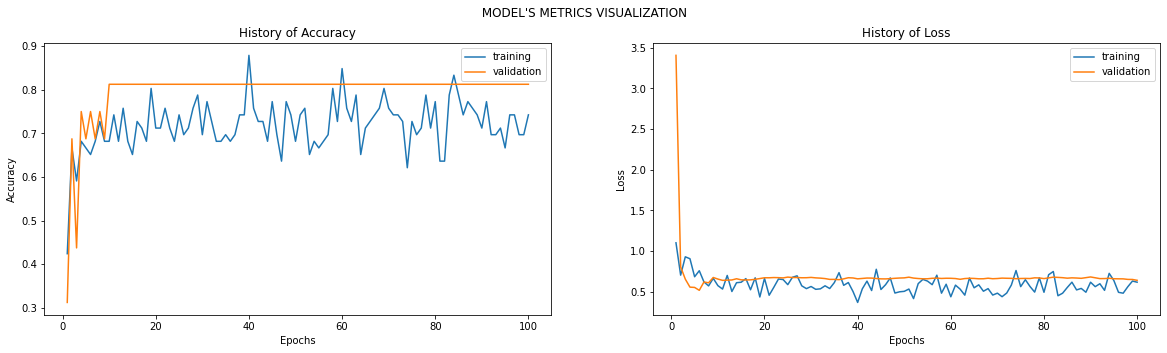

In [41]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    


    plt.show()
    
import matplotlib.pyplot as plt
Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
              )

In [119]:
model=build_model()
model.compile(optimizer = 'rmsprop',                 # 加速神经网络
        loss = 'categorical_crossentropy',   # 损失函数
        metrics = ['accuracy'], )

model.fit(Data_1,Label_1,batch_size=5,epochs=20,validation_split=0.2,callbacks=[reduce_lr])

Epoch 1/20
13/13 [==============================] - 2s 91ms/step - loss: 0.8964 - accuracy: 0.5692 - val_loss: 0.3448 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/20
13/13 [==============================] - 1s 77ms/step - loss: 0.7126 - accuracy: 0.6769 - val_loss: 0.5793 - val_accuracy: 0.5882 - lr: 0.0010
Epoch 3/20
13/13 [==============================] - 1s 79ms/step - loss: 0.7380 - accuracy: 0.6308 - val_loss: 0.5952 - val_accuracy: 0.6471 - lr: 0.0010
Epoch 4/20
13/13 [==============================] - 1s 79ms/step - loss: 0.6537 - accuracy: 0.6154 - val_loss: 0.5527 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 5/20
13/13 [==============================] - 1s 80ms/step - loss: 0.6482 - accuracy: 0.6769 - val_loss: 0.5227 - val_accuracy: 0.7647 - lr: 0.0010
Epoch 6/20
13/13 [==============================] - 1s 79ms/step - loss: 0.5580 - accuracy: 0.7231 - val_loss: 0.5205 - val_accuracy: 0.8235 - lr: 0.0010
Epoch 7/20
13/13 [==============================] - 1s 80ms/step - loss: 0.5

In [17]:

from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(Train.reshape(Train.shape[0],-1), label_train)
pred = model.predict(Test.reshape(Test.shape[0],-1))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_test, pred)
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

D:\kobe\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7058823529411765


In [18]:
from sklearn import ensemble
model=ensemble.GradientBoostingClassifier()
model.fit(Train.reshape(Train.shape[0],-1), label_train)
pred = model.predict(Test.reshape(Test.shape[0],-1))

cm = confusion_matrix(label_test, pred)
accuracy = (cm[0,0] + cm[1,1])/sum(sum(cm))
print(accuracy)

D:\kobe\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7058823529411765
